In [12]:
import pandas as pd
import numpy as np
import missingno as msno
df = pd.read_parquet("./knee-provider.parquet")

In [13]:
## Verwijderen van NA of Missende waarden in componenten van onze Y-waarden in navolging van preprocessing notebook van Dave 
df = df[df.t1_sucess != 9]
df = df[df.t1_satisfaction != 9]
df = df[df != 999]
df = df.dropna(subset=['oks_t1_score', 'oks_t0_score'])



In [17]:
#Om een eventuele foutmelding bij komend blok te voorkomen:
import os
os.environ["NotebookApp.iopub_data_rate_limit"] = str(1000000000)  # or any other higher value


In [20]:
#Ik hernoem alle kolommen die we voor de Y gebruiken zodat ik ze niet meefilter als ik alle t1-kolommen drop. 
df = df.rename({'oks_t1_score': 'oks_Y1_score'}, axis=1)
df = df.rename({'t1_sucess': 'Y1_success'}, axis=1)
df = df.rename({'t1_satisfaction': 'Y1_satisfaction'}, axis=1)
#print(dfn0)
df.drop(list(df.filter(regex = 't1')), axis = 1, inplace = True)


list(df.filter(regex='t1'))
#print(df)

[]

In [23]:
df.head()

,provider_code,procedure,revision_flag,year,age_band,gender,t0_assisted,t0_assisted_by,t0_symptom_period,t0_previous_surgery,t0_living_arrangements,t0_disability,heart_disease,high_bp,stroke,circulation,lung_disease,diabetes,kidney_disease,nervous_system,liver_disease,cancer,depression,arthritis,t0_mobility,t0_self_care,t0_activity,t0_discomfort,t0_anxiety,t0_eq5d_index_profile,t0_eq5d_index,Y1_satisfaction,Y1_success,t0_eq_vas,oks_t0_pain,oks_t0_night_pain,oks_t0_washing,oks_t0_transport,oks_t0_walking,oks_t0_standing,oks_t0_limping,oks_t0_kneeling,oks_t0_work,oks_t0_confidence,oks_t0_shopping,oks_t0_stairs,oks_t0_score,oks_Y1_score
0,ADP02,Knee Replacement,0,2018/19,NaN,NaN,2,0,2,2,2,1,1,9,9,9,9,9,9,9,9,9,9,1,2,1,2,2,1,21221,0.691,2,1,80.0,0,1,2,2,2,2,0,1,1,2,2,2,17.0,40.0
1,ADP02,Knee Replacement,0,2018/19,NaN,NaN,2,0,2,2,2,2,9,9,9,9,9,9,9,9,9,9,9,1,9,9,9,9,9,99999,NaN,2,1,NaN,1,4,4,4,0,4,1,4,4,3,4,4,37.0,44.0
2,ADP02,Knee Replacement,0,2018/19,NaN,NaN,2,0,2,2,1,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,99999,NaN,1,1,NaN,1,4,4,4,2,4,2,3,3,3,3,4,37.0,46.0
3,ADP02,Knee Replacement,0,2018/19,NaN,NaN,2,0,2,2,2,1,9,1,9,9,9,9,9,9,9,9,9,1,9,9,9,9,9,99999,NaN,3,2,NaN,1,2,2,2,2,2,2,0,1,3,3,2,22.0,36.0
4,ADP02,Knee Replacement,0,2018/19,NaN,NaN,1,0,3,2,2,1,9,1,9,9,9,9,9,9,9,9,9,1,2,1,2,9,1,21291,NaN,2,1,75.0,0,1,4,2,2,1,0,1,1,0,0,0,12.0,28.0


In [24]:
# set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# create the 'missing' column
df['missing'] = df.isnull().any(axis=1)

# group the data by the 'missing' column and calculate the mean of each column
grouped = df.groupby('missing').mean()

# calculate the absolute difference in means between the two groups
diff = abs(grouped.diff())

# sort the columns based on the difference in means
sorted_columns = diff.loc[True].sort_values(ascending=False).index.tolist()

# reorder the columns in the grouped dataframe
grouped = grouped[sorted_columns]

# print the group means
print(grouped)


         t0_eq5d_index_profile  t0_eq_vas  t0_anxiety  t0_discomfort  \
missing                                                                
False             20752.707892  67.499828    1.396763       2.367622   
True              34784.545144  65.494391    3.018862       3.903007   

         t0_self_care  t0_activity  t0_mobility  oks_Y1_score  oks_t0_score  \
missing                                                                       
False        1.304813     2.029033     1.921992     36.102070     19.132143   
True         2.718581     3.323729     3.169154     35.216267     18.453428   

          high_bp  arthritis  t0_disability  t0_living_arrangements  \
missing                                                               
False    5.382116   2.753136       1.762687                1.313948   
True     5.854683   3.204283       2.020549                1.479948   

         oks_t0_confidence  heart_disease  diabetes  oks_t0_work  \
missing                                  

C:\Users\neelt\AppData\Local\Temp\ipykernel_16752\243420136.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('missing').mean()


<AxesSubplot:>

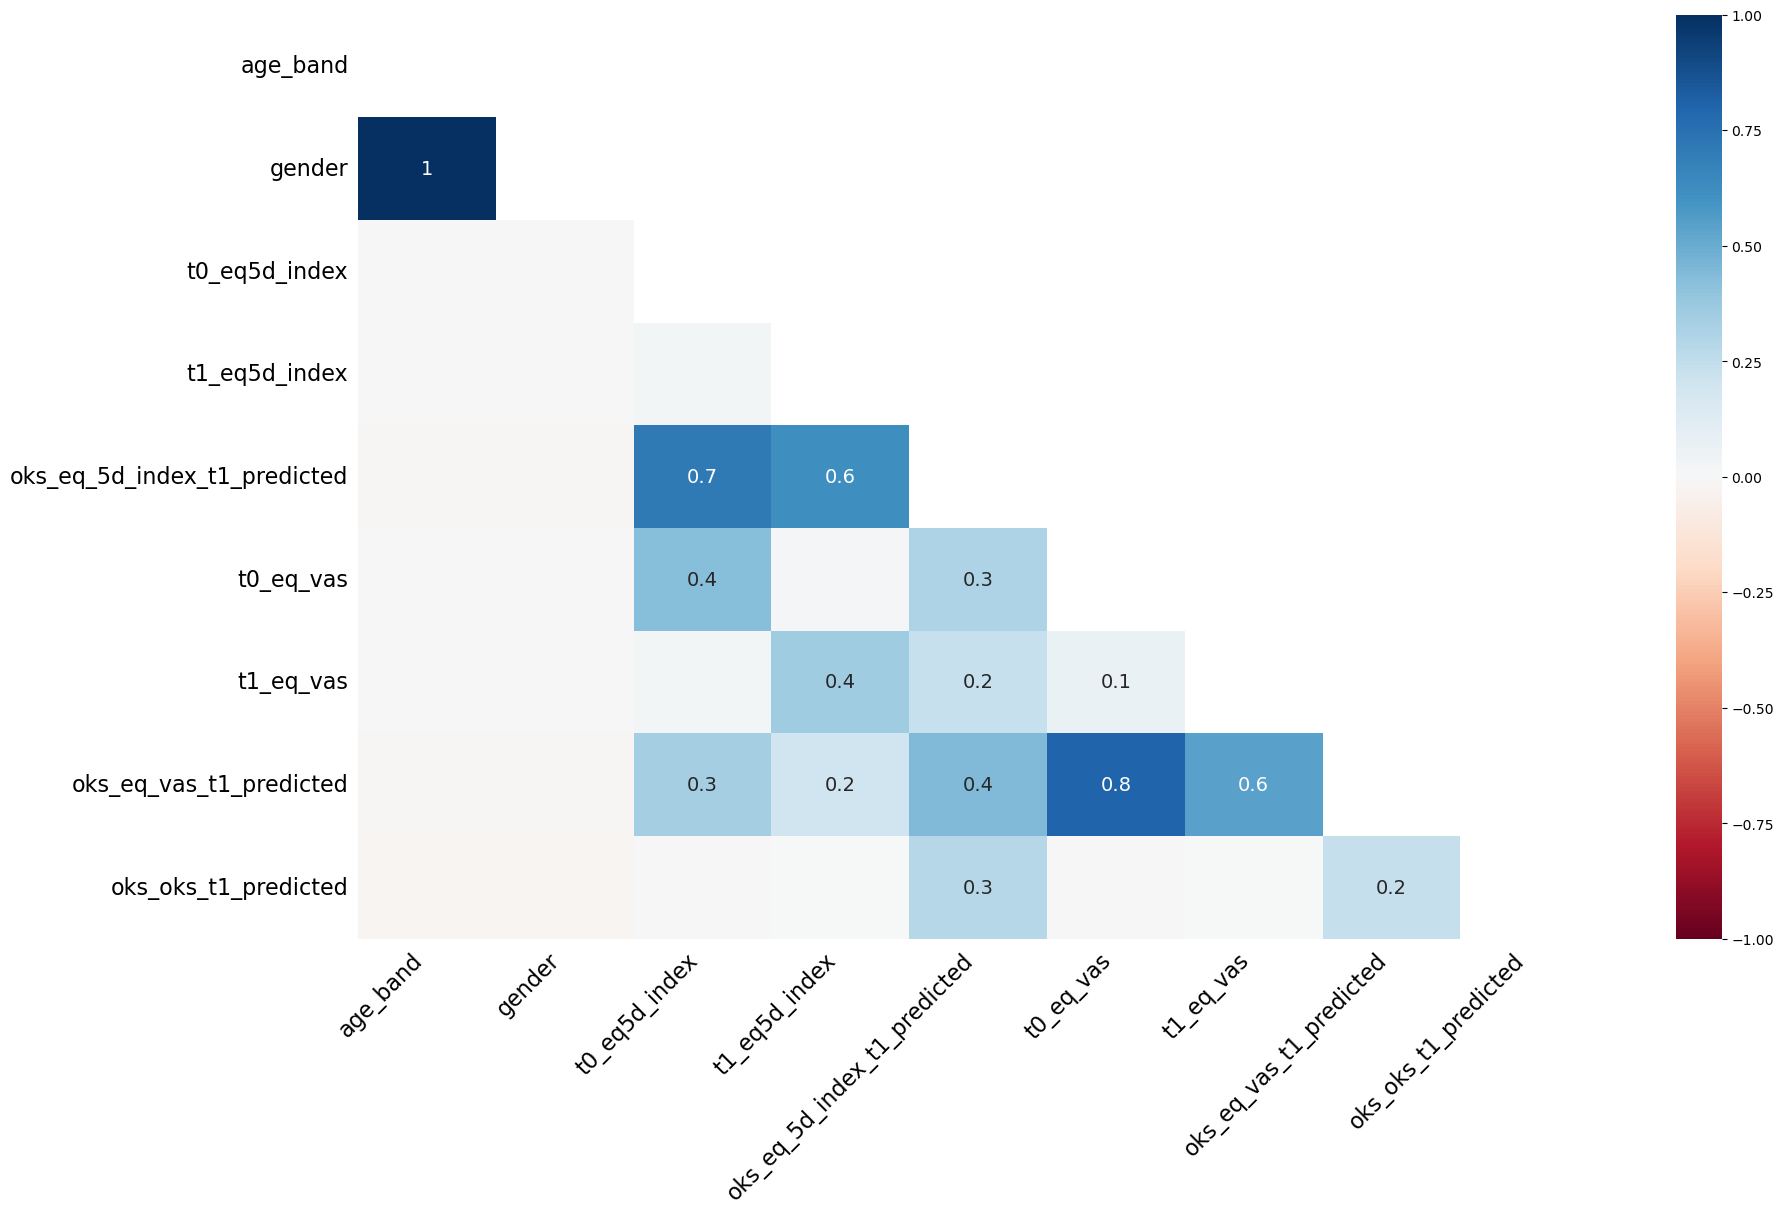

In [8]:
msno.heatmap(df)
#https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj 
#Onderstaande heatmap laat zien hoe groot de kans is dat er een NaN in een bepaalde kolom is als er al een NaN in een andere kolom is. 
#Gender en leeftijd zijn dus altijd samen wel of niet ingevuld. 

NameError: name 'DataTransformerRegistry' is not defined